In [1]:
import os
import pandas as pd 
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 설정
plt.rc('font', family = 'Malgun Gothic')

## 오산시 버스 정류장 

In [3]:
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
bus_df = pd.read_csv("전국버스정류장 위치정보.csv", encoding='cp949')

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,8,11,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_osan = bus_df[bus_df.ADMIN_NM == '오산'].reset_index(drop = True)
df_osan

,NODE_ID,NODE_NM,NODE_TP,CENTER_YN,ADMIN_NM,REMARK,NODE_CL,NODE_SUB_TP,NODE_ENM,GPS_LATI,...,DISTRICT_ID,COLLECTD_TIME,ORG_ID,ADMIN_ID,OFFSET,DIRECTION,DOWNTOWN_YN,NODE_MOBILE_ID,CITY_CODE,CITY_NAME
0,GGB223000309,수청초등학교앞,0.0,N,오산,NaN,NaN,NaN,NaN,37.170183,...,NaN,2020-09-24 04:30:03,44770100.0,NaN,NaN,NaN,Y,24284.0,31140,오산시
1,GGB223000311,아모레,0.0,N,오산,NaN,NaN,NaN,NaN,37.162667,...,NaN,2020-09-24 04:30:03,44770100.0,NaN,NaN,NaN,Y,24287.0,31140,오산시
2,GGB223000312,아모레,0.0,N,오산,NaN,NaN,NaN,NaN,37.162817,...,NaN,2020-09-24 04:30:03,44770100.0,NaN,NaN,NaN,Y,24286.0,31140,오산시
3,GGB223000313,쉼터공원입구,0.0,N,오산,NaN,NaN,NaN,NaN,37.161317,...,NaN,2020-09-24 04:30:04,44770100.0,NaN,NaN,NaN,Y,24305.0,31140,오산시
4,GGB223000315,서동탄역,0.0,N,오산,NaN,NaN,NaN,NaN,37.196917,...,NaN,2020-09-24 04:30:03,44770100.0,NaN,NaN,NaN,Y,24289.0,31140,오산시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,GGB277103448,오산TG(경유),0.0,N,오산,NaN,NaN,NaN,NaN,37.143017,...,NaN,2020-09-24 04:30:04,44770100.0,NaN,NaN,NaN,Y,0.0,31140,오산시
408,GGB277103449,오산TG(경유),0.0,N,오산,NaN,NaN,NaN,NaN,37.143317,...,NaN,2020-09-24 04:30:04,44770100.0,NaN,NaN,NaN,Y,0.0,31140,오산시
409,GGB277103619,북오산IC(경유),0.0,N,오산,NaN,NaN,NaN,NaN,37.183783,...,NaN,2020-09-24 04:30:04,44770100.0,NaN,NaN,NaN,Y,0.0,31140,오산시
410,GGB277103620,북오산IC(경유),0.0,N,오산,NaN,NaN,NaN,NaN,37.183517,...,NaN,2020-09-24 04:30:04,44770100.0,NaN,NaN,NaN,Y,0.0,31140,오산시


In [8]:
df_osan.loc[:,['NODE_ID','NODE_NM', 'GPS_LATI', 'GPS_LONG']]

,NODE_ID,NODE_NM,GPS_LATI,GPS_LONG
0,GGB223000309,수청초등학교앞,37.170183,127.057650
1,GGB223000311,아모레,37.162667,127.037983
2,GGB223000312,아모레,37.162817,127.037700
3,GGB223000313,쉼터공원입구,37.161317,127.038733
4,GGB223000315,서동탄역,37.196917,127.051783
...,...,...,...,...
407,GGB277103448,오산TG(경유),37.143017,127.080817
408,GGB277103449,오산TG(경유),37.143317,127.080800
409,GGB277103619,북오산IC(경유),37.183783,127.056950
410,GGB277103620,북오산IC(경유),37.183517,127.056533


In [4]:
NODE_NM = df_osan['NODE_NM']
GPS_LATI = df_osan['GPS_LATI']
GPS_LONG = df_osan['GPS_LONG']

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = GPS_LATI.mean()
long = GPS_LONG.mean()

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Marker(
        location = coords[i],
        icon=folium.Icon(color = 'green')
    ).add_to(m)

m.save('bus map.html')

## 오산시 지하철 

In [10]:
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
metro_df = pd.read_csv("도시철도역사정보.csv", encoding='cp949')

In [11]:
metro_df

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,116,부산원동역,k0211,동해선,Busanwondong,釜山院洞,일반역,NaN,NaN,35.362703,128.920499,한국철도공사,부산시 동래구 안락동 52-2,1544-7788,2020-12-31
1,336,임진강역,k0203,경의중앙선,Imjingang,臨津江,일반역,NaN,NaN,37.888364,126.746777,한국철도공사,경기도 파주시 문산읍 임진각로 115(문산읍),1544-7788,2020-12-31
2,313,서울역(경의선),k0203,경의중앙선,Seoul station,NaN,환승역,NaN,경의/1/4,37.554713,126.970787,한국철도공사,서울시 용산구 한강대로 405,1544-7788,2020-12-31
3,314,신촌역,k0203,경의중앙선,Sinchon,新 村,일반역,NaN,NaN,37.559768,126.942308,한국철도공사,서울특별시 서대문구 대현동 74-12,1544-7788,2020-12-31
4,315,가좌역,k0203,경의중앙선,Gajwa,加 佐,환승역,NaN,NaN,37.568611,126.914841,한국철도공사,서울시 서대문구 수색로 27(남가좌동),1544-7788,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,270,숭의역,K2015,수인선,Sungui,崇 義,일반역,NaN,NaN,37.460891,126.638035,한국철도공사,인천시 남구 인주대로 지하6,1544-7788,2020-12-31
274,271,신포역,K2015,수인선,Sinpo,新 浦,일반역,NaN,NaN,37.468442,126.624509,한국철도공사,인천시 중구 사동 26-19,1544-7788,2020-12-31
275,114,옥수역,k0205,경의중앙선,Oksu,玉 水,환승역,NaN,경의중앙/3,37.540514,127.018698,한국철도공사,서울시 성동구 동호로 지하21(옥수동),1544-7788,2020-12-31
276,115,응봉역,k0205,경의중앙선,Eungbong,鷹 峰,일반역,NaN,NaN,37.550433,127.034824,한국철도공사,서울시 성동구 고산자로 123(응봉동),1544-7788,2020-12-31


In [12]:
metro_df.loc[:,['역번호', '역사명', '역위도', '역경도']]

,역번호,역사명,역위도,역경도
0,116,부산원동역,35.362703,128.920499
1,336,임진강역,37.888364,126.746777
2,313,서울역(경의선),37.554713,126.970787
3,314,신촌역,37.559768,126.942308
4,315,가좌역,37.568611,126.914841
...,...,...,...,...
273,270,숭의역,37.460891,126.638035
274,271,신포역,37.468442,126.624509
275,114,옥수역,37.540514,127.018698
276,115,응봉역,37.550433,127.034824


In [7]:
osan_metro_df = metro_df[metro_df['역사도로명주소'].str.contains('오산')].reset_index(drop = True)
osan_metro_df

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,157,서동탄역,k0201,경부선,Seodongtan,西東灘,일반역,NaN,NaN,37.195675,127.051893,한국철도공사,경기도 오산시 외삼미로 15번길 75-60,1544-7788,2020-12-31
1,158,세마역,k0201,경부선,Sema,洗 馬,일반역,NaN,NaN,37.187288,127.043279,한국철도공사,경기도 오산시 세마역로 88,1544-7788,2020-12-31
2,159,오산대역,k0201,경부선,Osan College,烏山大,일반역,NaN,NaN,37.169401,127.063081,한국철도공사,경기도 오산시 청학로 236,1544-7788,2020-12-31
3,160,오산역,k0201,경부선,Osan,烏 山,일반역,NaN,NaN,37.145472,127.066708,한국철도공사,경기도 오산시 오산동 역광장로 59,1544-7788,2020-12-31


circle

In [8]:
NODE_NM = osan_metro_df['역사명']
GPS_LATI = osan_metro_df['역위도']
GPS_LONG = osan_metro_df['역경도']

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = GPS_LATI.mean()
long = GPS_LONG.mean()

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = 'red',
        fill = 'crimson',
    ).add_to(m)

m.save('metro map.html')

마커

In [9]:
NODE_NM = osan_metro_df['역사명']
GPS_LATI = osan_metro_df['역위도']
GPS_LONG = osan_metro_df['역경도']

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = GPS_LATI.mean()
long = GPS_LONG.mean()

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Marker(
        location = coords[i],
        icon=folium.Icon(color = 'red')
    ).add_to(m)

m.save('metro map.html')

## 복지 시설 

In [1]:
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
welfare_df = pd.read_csv("복지시설 위치정보.csv", encoding='cp949')
welfare_df

NameError: name 'os' is not defined

In [15]:
welfare_df.loc[:,['명칭', '시설구분', '위도', '경도']]

,명칭,시설구분,위도,경도
0,오산종합사회복지관,사회복지관,37.160148,127.077388
1,오산남부종합사회복지관,사회복지관,37.138822,127.072263
2,오산세교종합사회복지관,사회복지관,37.177653,127.045102
3,오산지역자활센터,기타시설,37.159395,127.056332


In [12]:
NODE_NM = welfare_df['명칭']
GPS_LATI = welfare_df['위도']
GPS_LONG = welfare_df['경도']

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = GPS_LATI.mean()
long = GPS_LONG.mean()

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Marker(
        location = coords[i],
        icon=folium.Icon(color = 'blue')
    ).add_to(m)

m.save('welfare map.html')

## 동별 인구수

In [13]:
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
population_df = pd.read_csv("주민등록인구.csv", encoding='cp949')
population_df

,행정구역,2021년08월_총인구수,2021년08월_세대수,2021년08월_세대당 인구,2021년08월_남자 인구수,2021년08월_여자 인구수,2021년08월_남여 비율
0,경기도 오산시 (4137000000),"230,555","101,600",2.27,"119,590","110,965",1.08
1,경기도 오산시 중앙동(4137051000),"35,780","14,245",2.51,"17,935","17,845",1.01
2,경기도 오산시 남촌동(4137053000),"20,638","13,816",1.49,"12,271","8,367",1.47
3,경기도 오산시 신장동(4137054000),"61,182","25,367",2.41,"30,942","30,240",1.02
4,경기도 오산시 세마동(4137055000),"32,033","12,924",2.48,"16,409","15,624",1.05
5,경기도 오산시 초평동(4137056000),"16,174","7,201",2.25,"8,312","7,862",1.06
6,경기도 오산시 대원동(4137057000),"64,748","28,047",2.31,"33,721","31,027",1.09


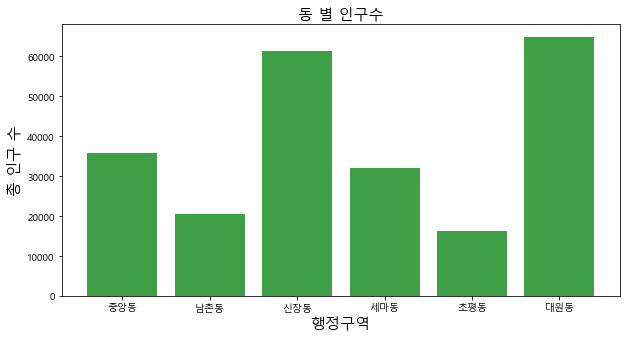

In [5]:
label = ['중앙동', '남촌동', '신장동', '세마동', '초평동', '대원동']
pop = [35780, 20638, 61182, 32033, 16174, 64748]
index = np.arange(len(pop))

plt.figure(figsize=(10,5))
plt.bar(index, pop, color = '#3F9F47')
plt.title('동 별 인구수', fontsize=15)
plt.xlabel('행정구역', fontsize=15)
plt.ylabel('총 인구 수', fontsize=15)
plt.xticks(index, label, fontsize=10)
plt.show()

위치 정보 크롤링 https://haries.tistory.com/7?category=885610

In [19]:
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
kid_df = pd.read_csv("어린이집도로명주소 변환.csv", encoding='cp949')
kid_df = kid_df[['소재지도로명주소', 'X', 'Y']].dropna()

In [20]:
kid_df

,소재지도로명주소,X,Y
0,경기도 오산시 남부대로 464-9 해오름어린이집 (청호동),127.084268,37.132334
1,경기도 오산시 수목원로 577 -15 203동 101호,127.041146,37.182077
2,"경기도 오산시 운암로 90 305동 102호(부산동, 운암주공3단지아파트)",127.079170,37.154008
3,"경기도 오산시 수청로 165 905동 104호(금암동,죽미마을휴먼시아휴튼아파트)",127.048734,37.177335
4,경기도 오산시 가장산업동로 37 아모레퍼시픽 오산 어린이집,127.038312,37.165237
...,...,...,...
252,"경기도 오산시 경기대로 74 101동 112호(갈곶동, 우림아파트)",127.073969,37.130980
253,"경기도 오산시 운암로 89 203동 101호(오산동, 운암주공2단지아파트)",127.076243,37.154686
254,"경기도 오산시 동부대로 332-14 101동 104호(청호동, 자이아파트)",127.080890,37.130832
255,경기도 오산시 양산로 460 124동 102호(양산동 세마e-편한세상아파트),127.033979,37.195793


## 합친거

In [24]:
#버스 
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
bus_df = pd.read_csv("전국버스정류장 위치정보.csv", encoding='cp949')
df_osan = bus_df[bus_df.ADMIN_NM == '오산'].reset_index(drop = True)

NODE_NM = df_osan['NODE_NM']
GPS_LATI = df_osan['GPS_LATI']
GPS_LONG = df_osan['GPS_LONG']

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = GPS_LATI.mean()
long = GPS_LONG.mean()

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = 'green',
        fill = 'crimson',
    ).add_to(m)

#어린이집시설 

os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
kid_df = pd.read_csv("어린이집도로명주소 변환.csv", encoding='cp949')
kid_df = kid_df[['소재지도로명주소', 'X', 'Y']].dropna().reset_index(drop = True)

NODE_NM = kid_df['소재지도로명주소']
GPS_LATI = kid_df['Y']
GPS_LONG = kid_df['X']

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = 'yellow',
        fill = 'crimson',
    ).add_to(m)
    
#지하철
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
metro_df = pd.read_csv("도시철도역사정보.csv", encoding='cp949')

osan_metro_df = metro_df[metro_df['역사도로명주소'].str.contains('오산')].reset_index(drop = True)

NODE_NM = osan_metro_df['역사명']
GPS_LATI = osan_metro_df['역위도']
GPS_LONG = osan_metro_df['역경도']

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = 'blue',
        fill = 'crimson',
    ).add_to(m)


#사회복지시설
os.chdir("C:\\Users\\admin\\PycharmProjects\\오산시")
welfare_df = pd.read_csv("복지시설 위치정보.csv", encoding='cp949')

NODE_NM = welfare_df['명칭']
GPS_LATI = welfare_df['위도']
GPS_LONG = welfare_df['경도']

coords = []
for i in range(len(NODE_NM)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = 'red',
        fill = 'crimson',
    ).add_to(m)

m.save('map1.html')

## 후보지 

In [6]:
GPS_LATI = [37.196023, 37.162027, 37.173792, 37.128387, 37.132654]
GPS_LONG = [127.040028, 127.051036, 127.080778, 127.083632, 127.062880]

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = np.mean(GPS_LATI)
long = np.mean(GPS_LONG)

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(GPS_LATI)):
    x = GPS_LATI[i]
    y = GPS_LONG[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Marker(
        location = coords[i],
        icon=folium.Icon(color = 'red')
    ).add_to(m)

m.save('후보지 map.html')